<h1><center>Identifying TOOLS LOCATION For HARDWARE STORE</center></h1>

In [1]:
import os
import numpy as np
import tensorflow as tf

# Defining each of these directories

In [2]:
input_path = 'C:\\Users\\Sanchita\\Desktop\\mechanical-tools-dataset'
#base_dir = '../input/mechanical-tools-dataset/Mechanical Tools Image dataset'

train_dir = (input_path+'\\train_data\\train_data')
validation_dir = (input_path+'\\validation_data')

# Pre-Trained Model

In [3]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3


pre_trained_model = InceptionV3(input_shape = (300,300, 3), 
                                include_top = False, 
                                weights = 'imagenet')


for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 17, 17, 768)


# Data Preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/255.
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=30,
                                                    class_mode='categorical',
                                                    target_size=(300,300))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=30,
                                                         class_mode  = 'categorical',
                                                         target_size = (300,300))

#generator= train_datagen.flow_from_directory("train", batch_size=batch_size)
#label_map = (train_generator.class_indices)
#print(label_map)

Found 5710 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [5]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(8, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [6]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
#training the model
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=20,
                              epochs=40,
                              validation_steps=10,
                              verbose=2)

In [7]:
from tensorflow import keras

# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
#model.save("Mymodel_6_classes.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Mymodel_6_classes.h5")

In [8]:
#do not run,trained model graphs require history variavle
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'  )

print(epochs)

NameError: name 'history' is not defined

In [8]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
array=['Gasoline Can', 'Hammer', 'Pliers', 'Rope', 'Screw Driver', 'Tool box', 'Wrench', 'pebbel']
location=['Shelf A','Shelf B','Shelf C','Shelf D','Shelf E','Shelf F','Shelf G','Shelf H',]

This is a Wrench
It is present at location: Shelf G


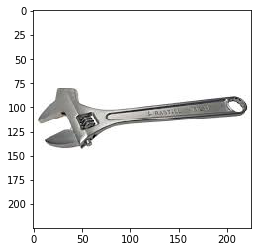

In [9]:
img_path=input_path+'\\train_data_V2\\train_data_V2\\wrench\\000000.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)
img = cv2.imread(img_path)
img = cv2.resize(img,(300, 300))
img = img/255
img = np.reshape(img,[1,300, 300,3])

classes = reconstructed_model.predict(img)
#print(classes)
print("This is a "+array[np.argmax(classes[0])])
print("It is present at location: "+location[np.argmax(classes[0])])

This is a Screw Driver
It is present at location: Shelf E


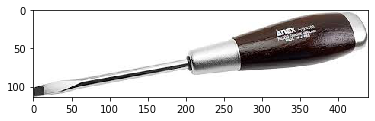

In [12]:
img_path=input_path+'\\train_data_V2\\train_data_V2\\screwdriver\\000000.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)
img = cv2.imread(img_path)
img = cv2.resize(img,(300, 300))
img = img/255
img = np.reshape(img,[1,300, 300,3])

classes = reconstructed_model.predict(img)
#print(classes)
print("This is a "+array[np.argmax(classes[0])])
print("It is present at location: "+location[np.argmax(classes[0])])

This is a Wrench
It is present at location: Shelf G


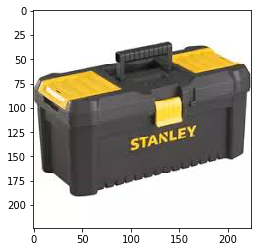

In [13]:
img_path=input_path+'\\test_data\\test_data\\000001.jpg'
#C:\Users\Sanchita\Desktop\mechanical-tools-dataset\test_data\test_data\000001 (1).jpg
img = mpimg.imread(img_path)
plt.imshow(img)
img = cv2.imread(img_path)
img = cv2.resize(img,(300, 300))
img = img/255
img = np.reshape(img,[1,300, 300,3])

classes = model.predict(img)
print("This is a "+array[np.argmax(classes[0])])
print("It is present at location: "+location[np.argmax(classes[0])])